## Explicação das colunas dos Dados
*train*.csv:

*PassengerId*: ID único do passageiro.

*HomePlanet*: Planeta de origem do passageiro.

*CryoSleep*: Indica se o passageiro escolheu a animação suspensa.

*Cabin*: Número da cabine do passageiro.

*Destination*: Planeta de destino do passageiro.

*Age*: Idade do passageiro.

*VIP*: Se o passageiro comprou um serviço VIP.

*RoomService*, *FoodCourt*, *ShoppingMall*, *Spa*, *VRDeck*: Gastos em comodidades de luxo.

*Name*: Nome completo do passageiro.

*Transported*: Se o passageiro foi transportado para outra dimensão (coluna-alvo).


In [361]:
#Importando Bibliotecas(Extração, tratamento, visualização de dados)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Importando Bibliotecas dos Algoritmos de maquina(Machine Learning)
from sklearn import model_selection
from sklearn.model_selection import cross_val_predict, train_test_split
from sklearn import metrics


#Algoritmos de maquina
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV



In [229]:
#Importando bancos de dados
df_train = pd.read_csv('C:\\Users\\Thiago\\Documents\\devenvs\\ambiente_virtual3\\Projetos\\Brutos\\titanicEspacial\\train.csv')
df_test = pd.read_csv('C:\\Users\\Thiago\\Documents\\devenvs\\ambiente_virtual3\\Projetos\\Brutos\\titanicEspacial\\test.csv')

In [230]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [231]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [373]:
#Guardando coluna do PassegerId do Test, para enviar para Kaggle depois
passengerId = df_test['PassengerId']

In [233]:
#Juntando os dois DataFrames, para facilitar o tratamento dos Dados.
df = pd.concat([df_train,df_test],axis=0, ignore_index=True)
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,NaN
12966,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,NaN
12967,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,NaN
12968,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,NaN


In [234]:
#Observando sem tem valores Duplicatos
df.duplicated().sum()

0

In [235]:
#Observando se ha problemas nos Dados(E sim, ha! Muitos :())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12970 entries, 0 to 12969
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   12970 non-null  object 
 1   HomePlanet    12682 non-null  object 
 2   CryoSleep     12660 non-null  object 
 3   Cabin         12671 non-null  object 
 4   Destination   12696 non-null  object 
 5   Age           12700 non-null  float64
 6   VIP           12674 non-null  object 
 7   RoomService   12707 non-null  float64
 8   FoodCourt     12681 non-null  float64
 9   ShoppingMall  12664 non-null  float64
 10  Spa           12686 non-null  float64
 11  VRDeck        12702 non-null  float64
 12  Name          12676 non-null  object 
 13  Transported   8693 non-null   object 
dtypes: float64(6), object(8)
memory usage: 1.4+ MB


In [236]:
#Observando Valores Outliers ou estranhos
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,12700.000000,12707.000000,12681.000000,12664.000000,12686.000000,12702.000000
mean,28.771969,222.897852,451.961675,174.906033,308.476904,306.789482
std,14.387261,647.596664,1584.370747,590.558690,1130.279641,1180.097223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,49.000000,77.000000,29.000000,57.000000,42.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [237]:
#Checando e elimando dados duplicados
df['Age'].duplicated().sum()

12889

In [238]:
df1 = pd.DataFrame() #DataFrame que receberá todos os Dados Tratados

In [239]:
#Fazendo função para facilitar a observação dos resumos de cada atributo(coluna)
def func_relatorio(data,columns,graphics = True):

    print(f'Valores NULLOS:{data[columns].isnull().sum()}')

    print(f'Valores ÚNICOS:{data[columns].unique()}')
    print(f'QUANTIDADE valores Únicos:{data[columns].value_counts()}')

    if graphics == True:
        sns.countplot(data=data,x=columns,hue='Transported')
    else:
        sns.displot(data=data,x=columns, kde =True)


### PassengerId

In [240]:
#Vou separar o id do Passageiro, isto por que os numeros da primeira parte do PassengerID não se repetem, e se repetir, significa que os passageiros estão juntos(são da mesma familia).
df['Id']  = df['PassengerId'].apply(lambda x: x.split('_')[0])#Primeira parte do número da coluna PassengerId
df['NumId'] = df['PassengerId'].apply(lambda x: x.split('_')[1]) #Segunda parte do número da coluna PassengerId
df.drop('PassengerId',axis=1,inplace=True) #Apagando coluna PassengerId, já que não usarei mais. 

#Transformando str em Númericos
df['Id'] = df['Id'].apply(lambda x: x if pd.isna(x) else int(x))
df['NumId'] = df['NumId'].apply(lambda x: x if pd.isna(x) else int(x))
df



,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Id,NumId
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1,1
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,2,1
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,3,1
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,3,2
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,NaN,9266,2
12966,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,NaN,9269,1
12967,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,NaN,9271,1
12968,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,NaN,9273,1


In [241]:
#df1 recebendo Id e NumId
df1['Id'] = df['Id']
df1['NumId'] = df['NumId']


### Transported

In [242]:
df['Transported']

0        False
1         True
2        False
3        False
4         True
         ...  
12965      NaN
12966      NaN
12967      NaN
12968      NaN
12969      NaN
Name: Transported, Length: 12970, dtype: object

In [243]:
#Transformando Valores de False e True em 0 e 1(para facilitar no aprendizado de maquina)
df['Transported'] = df['Transported'].apply(lambda n: 1 if n == 1 else (0 if n == 0 else n))
df['Transported']

0        0.0
1        1.0
2        0.0
3        0.0
4        1.0
        ... 
12965    NaN
12966    NaN
12967    NaN
12968    NaN
12969    NaN
Name: Transported, Length: 12970, dtype: float64

Valores NULLOS:4277
Valores ÚNICOS:[ 0.  1. nan]
QUANTIDADE valores Únicos:Transported
1.0    4378
0.0    4315
Name: count, dtype: int64


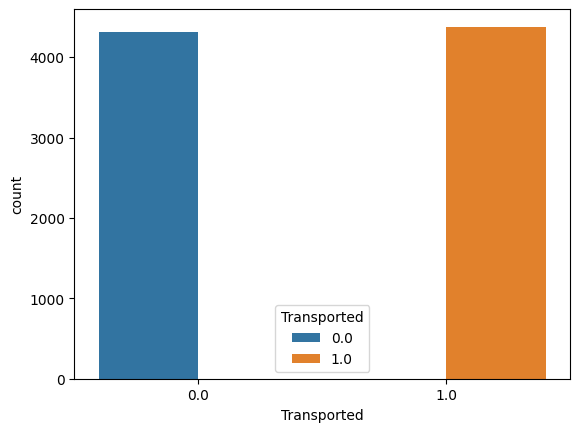

In [244]:
func_relatorio(df,'Transported')

In [245]:
df['Transported'].value_counts()

Transported
1.0    4378
0.0    4315
Name: count, dtype: int64

In [246]:
#df1 recebendo Transported
df1['Transported'] = df['Transported']

### HomePlanet

In [247]:
# Todos aqueles que tem familiares, mas que eles mesmo tem o HomePlanet em NAN
quantidadeFamilyHomePlanet = df[(df['Id'].duplicated()) & (df['HomePlanet'].isnull())]['Id'].values
quantidadeFamilyHomePlanet

array([  64,  444,  445,  470,  504,  539,  540,  560,  594,  772,  911,
       1024, 1865, 2055, 2384, 2404, 2597, 2799, 2822, 2908, 3131, 3361,
       3439, 4172, 4216, 4371, 4625, 4655, 4822, 4933, 5090, 5367, 5424,
       5465, 5810, 5981, 6032, 6036, 6262, 6263, 6313, 6363, 6402, 6490,
       6512, 6561, 6634, 6810, 6954, 7336, 7584, 7703, 7830, 8202, 8314,
       8322, 8816, 8860, 8961, 9030, 1124, 1184, 1471, 1553, 1862, 2057,
       2430, 3008, 3125, 3368, 3589, 4455, 4639, 4671, 4984, 5588, 5841,
       6119, 6499, 6559, 6961, 7482, 7541, 7556], dtype=int64)

In [248]:
#resultado dos dados da coluna HomePlanet dos familiares com valores preenchidos .
familyHomePlanet = df.loc[df['Id'].isin(quantidadeFamilyHomePlanet)].drop_duplicates(subset=['Id'])[['Id','HomePlanet']]

In [249]:
#Preenchendo valores Nullos dos familiares com os dados dos familiares que tem dados.
for x in quantidadeFamilyHomePlanet:
    HomePlanet_value = familyHomePlanet.loc[familyHomePlanet['Id'] == x, 'HomePlanet'].values[0]

    df.loc[((df['HomePlanet'].isna()) & (df['Id'] == x)), 'HomePlanet'] = HomePlanet_value

In [250]:
#Filtrando dados para achar o provavel Home do passageiro, para preencher os valores Nullos.

#Usando medias de idades, para ajudar a achar melhor o lar dessas pessoas(Mesmo que um dos parâmetros seja a propria coluna HomePlanet ainda com valores nullos)
MediaPorHomeDesti2 = df.groupby(['HomePlanet']).mean('Age')['Age'].reset_index().astype({'Age':int})
MediaPorHomeDesti2

,HomePlanet,Age
0,Earth,25
1,Europa,34
2,Mars,29


In [251]:
#Função para preencher valores Null de HomePlanet
def func_provavelHome(home,age):

    if pd.isna(home): #Usanod função isna para vê se está vazio essa linha da coluna HomePlanet
        if 26 < age <= 34:
            return 'Europa'
        elif age <= 26:
            return 'Earth'
        elif age > 34:
            return 'Mars'
    else:
        return home


In [252]:
#Vendo se ainda há valores vazios!
df['HomePlanet'] = df.apply(lambda x: func_provavelHome(x['HomePlanet'],x['Age']),axis=1)
df[df['HomePlanet'].isnull()]

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Id,NumId
9181,None,True,G/157/P,TRAPPIST-1e,NaN,False,0.0,0.0,NaN,0.0,0.0,Evendy Buchansen,NaN,1050,1
11447,None,True,F/1256/P,TRAPPIST-1e,NaN,False,0.0,0.0,0.0,0.0,0.0,Ecco Shpie,NaN,6081,1
11676,None,False,B/252/S,55 Cancri e,NaN,False,0.0,509.0,0.0,3828.0,707.0,Grumak Porkilte,NaN,6550,1


In [253]:
#Temos cinco valores que continuaram vazios, pelo fato de não ter idade tambem...vou tentar preenche-los atráves de outro Groupby.
destiTrap = df.loc[df['Destination'] == 'TRAPPIST-1e'] #pegando dados apenas dos que tinham seu DESTINATION para  TRAPPIST-1e

#Está dificil decidir em qual planeta eles vieram, vou por fim arriscar a EARTH(Terra)
destiTrap.groupby(['CryoSleep'])['HomePlanet'].value_counts() 


CryoSleep  HomePlanet
False      Earth         3411
           Mars          1384
           Europa        1039
True       Earth         1236
           Mars           889
           Europa         696
Name: count, dtype: int64

In [254]:
destiCancri = df.loc[df['Destination'] == '55 Cancri e'] #pegando dados apenas dos que tinham seu DESTINATION para  55 Cancri e	

#Está dificil decidir em qual planeta eles vieram, vou por fim arriscar a EARTH(Terra)
destiCancri.groupby(['CryoSleep'])['HomePlanet'].value_counts() #Esse vai pra Terra tambem. 

CryoSleep  HomePlanet
False      Earth         674
           Europa        626
           Mars          174
True       Europa        667
           Earth         308
           Mars          128
Name: count, dtype: int64

In [255]:
#Substituindo os valores vazios pelo que decidir(no caso, Earth)
df['HomePlanet'].fillna('Earth',inplace=True)

Valores NULLOS:0
Valores ÚNICOS:['Europa' 'Earth' 'Mars']
QUANTIDADE valores Únicos:HomePlanet
Earth     7003
Europa    3193
Mars      2774
Name: count, dtype: int64


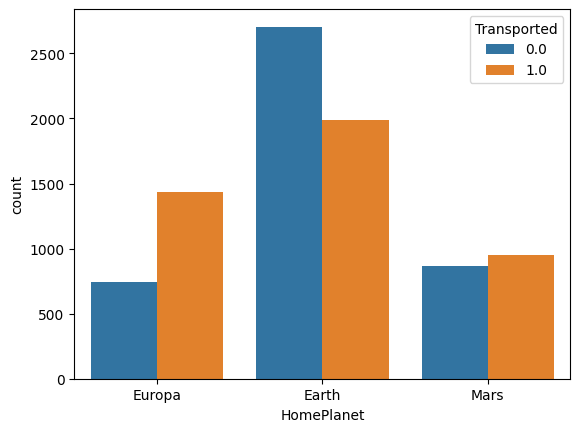

In [256]:
func_relatorio(df,'HomePlanet')

In [257]:
#Transformando valores Str em numerico(categoricos)| 0 = Earth, 1 = Europa, 2 = Mars
df['HomePlanet'] = df['HomePlanet'].apply(lambda x: 0 if x == 'Earth' else(1 if x == 'Europa' else 2))

In [258]:
#Sem valores Nullos, eu posso guardar na váriavel que é df1
df1['HomePlanet'] = df['HomePlanet']

### CryoSleep

In [259]:
#Checando quantidades de valores Nullos
df['CryoSleep'].isnull().sum()

310

In [260]:
#Transformando Colunas, Para que sejam númericas!
df['CryoSleep'] = df['CryoSleep'].apply(lambda x: 0 if x == 0 else(1 if x == 1 else x))
df['CryoSleep'].head(3)

0    0.0
1    0.0
2    0.0
Name: CryoSleep, dtype: float64

In [261]:
#Agrupamento para descobrir a possibilidade de o passageiro estar em CryoSleep ou não!
cryoPossi = df.groupby(['HomePlanet','Destination'])['CryoSleep'].mean().reset_index()
cryoPossi

,HomePlanet,Destination,CryoSleep
0,0,55 Cancri e,0.313327
1,0,PSO J318.5-22,0.511804
2,0,TRAPPIST-1e,0.266294
3,1,55 Cancri e,0.515855
4,1,PSO J318.5-22,0.551724
5,1,TRAPPIST-1e,0.401153
6,2,55 Cancri e,0.423841
7,2,PSO J318.5-22,0.242857
8,2,TRAPPIST-1e,0.391113


In [262]:
#Função para preencher valores Null de CryoSleep
def fun_cryoSleep(sleep,home,destination):
    
    if pd.notna(destination):
        #Resultado devolve a media do DataFrame cryoPossi(Criado para pegar a possivel identificação se as pessoas dormiram ou não em criogenia)
        resultado = cryoPossi.loc[(cryoPossi['HomePlanet'] == home) & (cryoPossi['Destination'] == destination),'CryoSleep'].iloc[0]        
    
        if pd.isna(sleep):
            if resultado >= 0.5:
                return 1
            else :
                return 0
        else:
            return sleep
        
    else:
        return sleep


In [263]:
df['CryoSleep'] = df.apply(lambda x: fun_cryoSleep(x['CryoSleep'],x['HomePlanet'],x['Destination']),axis=1)

In [264]:
#Temos 7 valores que continuaram vazios, pelo fato de não ter Destination ...vou preenche-los somente com HomePlanet.
df[df['CryoSleep'].isnull()]

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Id,NumId
6057,0,NaN,NaN,NaN,2.0,False,0.0,0.0,0.0,0.0,0.0,Feline Toddleton,1.0,6405,2
6904,1,NaN,C/237/P,NaN,33.0,False,0.0,0.0,0.0,NaN,0.0,Aldun Venticable,1.0,7314,1
7114,1,NaN,B/288/S,NaN,19.0,False,0.0,0.0,0.0,0.0,0.0,Arrain Swingse,1.0,7584,1
8012,2,NaN,D/258/S,NaN,53.0,False,1042.0,0.0,2.0,1.0,11.0,Yakers Welte,0.0,8574,2
9202,0,NaN,G/164/P,NaN,16.0,False,0.0,0.0,0.0,0.0,0.0,Viviay Steeletters,NaN,1081,1
10252,1,NaN,E/227/S,NaN,27.0,False,0.0,1624.0,0.0,53.0,1152.0,Anyonon Redishaft,NaN,3356,1
11612,0,NaN,G/1036/P,NaN,20.0,False,330.0,1400.0,20.0,0.0,66.0,Cary Rocholton,NaN,6420,1


In [265]:
values = df.groupby(['HomePlanet','CryoSleep'])['CryoSleep'].value_counts().reset_index()
values

,HomePlanet,CryoSleep,count
0,0,0.0,4861
1,0,1.0,2139
2,1,0.0,1756
3,1,1.0,1434
4,2,0.0,1709
5,2,1.0,1064


In [266]:
#Função para prencher os ultimos sete valores vazios e CryoSleep, de acordo com a quantidade MAX de cada HomePlanet.
#Uso essa forma de decidir o CryoSleep, pois não consigo pensar em outra coluna para usar como agrupamento.
def valor(home,sleep):
    if pd.isna(sleep):
       resultado = values[values['HomePlanet'] == 1]['count'].max()
       return values.loc[values['count'] == resultado]['CryoSleep'].iloc[0]

    else:
        return sleep


In [267]:
#Preenchendo os valores vazios restantes de CryoSleep
df['CryoSleep'] = df.apply(lambda x: valor(x['HomePlanet'],x['CryoSleep']),axis=1)

Valores NULLOS:0
Valores ÚNICOS:[0. 1.]
QUANTIDADE valores Únicos:CryoSleep
0.0    8333
1.0    4637
Name: count, dtype: int64


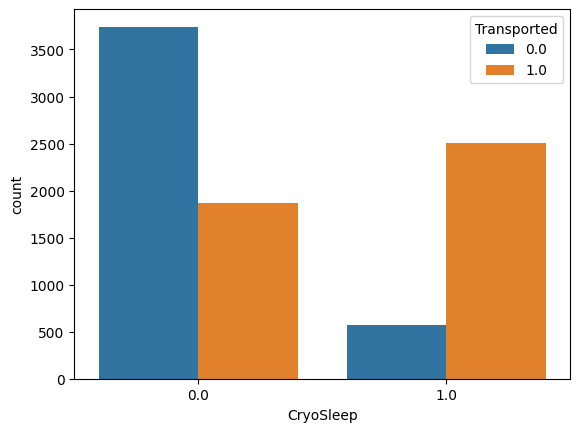

In [268]:
func_relatorio(df,'CryoSleep')

In [269]:
#Sem valores Nullos, eu posso guardar na váriavel que é df1
df1['CryoSleep'] = df['CryoSleep']

### Destination   

In [270]:
#Transformando valores str em númericos(categoricos).| 0 = TRAPPIST-1e, 1 = PSO J318.5-22, 2 = 55 Cancri e
df['Destination'] = df['Destination'].apply(lambda x: 0 if x =='TRAPPIST-1e' else(1 if x == 'PSO J318.5-22' else(2 if x == '55 Cancri e' else x)))

In [271]:
#Media Ponderada para Descobrir Destination dos Passageiros.
mediaDestination = df.groupby(['HomePlanet','CryoSleep']).mean('Destination')['Destination'].reset_index()
# Optei por utilizar uma média ponderada em vez de uma média simples para determinar o destino dos passageiros, uma vez que temos três opções disponíveis, tornando a decisão mais complexa.

#Estabeleci um limite de 0.33 para a média ponderada. Isso significa que, se a média ponderada estiver abaixo ou igual a 0.33, o destino atribuído será 0. Se estiver entre 0.33 (exclusive) e 1 (inclusive), o destino será 1. E se estiver acima de 1, o destino será 2. Essa abordagem ajuda a tomar decisões com base em probabilidades, considerando as três opções disponíveis.

mediaDestination['median_pond'] = round((mediaDestination['HomePlanet'] * 2 + mediaDestination['CryoSleep'] * 1) / (2 + 1),2)
mediaDestination

,HomePlanet,CryoSleep,Destination,median_pond
0,0,0.0,0.403246,0.00
1,0,1.0,0.559659,0.33
2,1,0.0,0.733759,0.67
3,1,1.0,1.002126,1.00
4,2,0.0,0.250748,1.33
5,2,1.0,0.264023,1.67


In [272]:
#Função para preencher valores Null de Destination!
def fun_Destination(destination,home,sleep):


    if (pd.notna(sleep)) & (pd.isna(destination)):
        resultado = mediaDestination.loc[(mediaDestination['HomePlanet'] == home) & (mediaDestination['CryoSleep'] == sleep),'median_pond'].iloc[0]

        if resultado <= 0.33:
            return  0 #TRAPPIST-1e
        elif 0.33 < resultado <= 1.0:
            return 1 #PSO J318.5-22
        elif resultado > 1.0:
            return 2 #55 Cancri e
        else:
            return destination
    else:
        return destination
    


In [273]:
#Preenchendo valores Vazios da Coluna Destination
df['Destination'] = df.apply(lambda x: fun_Destination(x['Destination'],x['HomePlanet'],x['CryoSleep']),axis=1)

Valores NULLOS:0
Valores ÚNICOS:[0. 1. 2.]
QUANTIDADE valores Únicos:Destination
0.0    9018
2.0    2710
1.0    1242
Name: count, dtype: int64


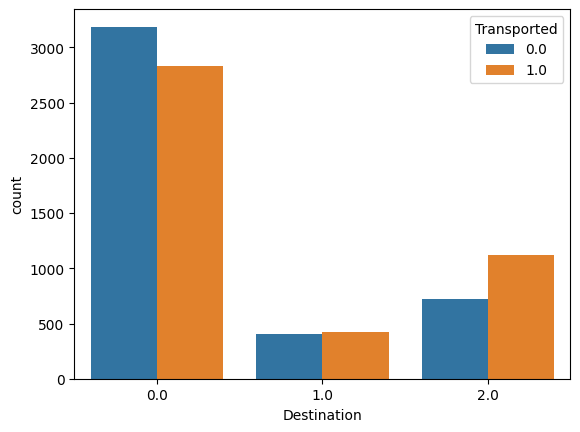

In [274]:
func_relatorio(df,'Destination')

In [275]:
#Sem valores Nullos, eu posso guardar na váriavel que é df1
df1['Destination'] = df['Destination']

### Cabin

In [276]:
df['Cabin']

0           B/0/P
1           F/0/S
2           A/0/S
3           A/0/S
4           F/1/S
           ...   
12965    G/1496/S
12966         NaN
12967     D/296/P
12968     D/297/P
12969    G/1498/S
Name: Cabin, Length: 12970, dtype: object

In [277]:
#Vou dividir a coluna Cabin, para melhor análise.
#B/0/P
#A coluna cabine se refere a deck(Refere-se ao convés em que a cabine está localizada)\ Número da cabine no deck\ esta parte indica se a cabine está no lado esquerdo (Porto) ou direito (Starboard) do navio.

deck = df['Cabin'].apply(lambda x: x if pd.isna(x) else x.split('/')[0] )
num = df['Cabin'].apply(lambda x: x if pd.isna(x) else x.split('/')[1])
sidesidePS = df['Cabin'].apply(lambda x: x if pd.isna(x) else x.split('/')[2]) 

df['Deck'] = deck
df['Num'] = num.apply(lambda x: x if pd.isna(x) else int(x) )
df['SidesidePS'] = sidesidePS

#Excluindo coluna Cabin, já não é necessária!
df.drop('Cabin',axis=1,inplace=True)

In [278]:
#Observando o Dataframe com as novas três colunas e sem a coluna Cabin
df.head(4)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Id,NumId,Deck,Num,SidesidePS
0,1,0.0,0.0,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0.0,1,1,B,0.0,P
1,0,0.0,0.0,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1.0,2,1,F,0.0,S
2,1,0.0,0.0,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0.0,3,1,A,0.0,S
3,1,0.0,0.0,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0.0,3,2,A,0.0,S


In [279]:
#Transformando Deck e SidesidePs de strings para categoricos. 

def string_para_categorico(data,column,valor):
    nullas = data[column].unique()
    nullas2 = nullas[pd.notna(nullas)]


    for i in range(len(nullas2)):
        if nullas2[i] == valor:
            return int(np.where(nullas2 == valor)[0][0])


df['Deck'] = df['Deck'].apply(lambda x: string_para_categorico(df,'Deck',x))
df['SidesidePS'] = df['SidesidePS'].apply(lambda x: string_para_categorico(df,'SidesidePS',x))

### Deck - 

In [280]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12970 entries, 0 to 12969
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    12970 non-null  int64  
 1   CryoSleep     12970 non-null  float64
 2   Destination   12970 non-null  float64
 3   Age           12700 non-null  float64
 4   VIP           12674 non-null  object 
 5   RoomService   12707 non-null  float64
 6   FoodCourt     12681 non-null  float64
 7   ShoppingMall  12664 non-null  float64
 8   Spa           12686 non-null  float64
 9   VRDeck        12702 non-null  float64
 10  Name          12676 non-null  object 
 11  Transported   8693 non-null   float64
 12  Id            12970 non-null  int64  
 13  NumId         12970 non-null  int64  
 14  Deck          12671 non-null  float64
 15  Num           12671 non-null  float64
 16  SidesidePS    12671 non-null  float64
dtypes: float64(12), int64(3), object(2)
memory usage: 1.7+ MB


In [281]:
df['Deck'].value_counts()

Deck
1.0    4239
3.0    3781
4.0    1323
0.0    1141
6.0    1102
5.0     720
2.0     354
7.0      11
Name: count, dtype: int64

In [282]:
df[df['Deck'].isnull()]

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Id,NumId,Deck,Num,SidesidePS
15,0,0.0,0.0,31.0,False,32.0,0.0,876.0,0.0,0.0,Justie Pooles,0.0,12,1,NaN,NaN,NaN
93,2,1.0,0.0,31.0,False,0.0,0.0,0.0,0.0,0.0,Book Trad,1.0,101,1,NaN,NaN,NaN
103,1,0.0,0.0,32.0,False,0.0,410.0,6.0,3929.0,764.0,Graviph Aloubtled,0.0,110,1,NaN,NaN,NaN
222,2,0.0,0.0,37.0,False,637.0,0.0,0.0,92.0,319.0,Diedow Resty,0.0,239,1,NaN,NaN,NaN
227,2,1.0,0.0,43.0,False,0.0,0.0,0.0,0.0,0.0,Froos Sad,1.0,244,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12902,1,0.0,0.0,41.0,False,0.0,1998.0,0.0,1023.0,867.0,Misamak Trupistic,NaN,9138,1,NaN,NaN,NaN
12941,2,1.0,0.0,24.0,False,0.0,0.0,NaN,0.0,0.0,Weessh Sun,NaN,9223,1,NaN,NaN,NaN
12942,2,1.0,0.0,17.0,False,0.0,0.0,0.0,0.0,0.0,Perit Sun,NaN,9223,2,NaN,NaN,NaN
12951,0,1.0,0.0,14.0,False,0.0,0.0,0.0,0.0,0.0,Caseye Emenez,NaN,9238,5,NaN,NaN,NaN


In [283]:
#Todas as pessoas que tem o Deck(pelo que observei, todas os familiares que tem o deck vazio, tem tambem o Num e SidesidePS )como vazio.
quantidadeFamily =df[(df['Id'].duplicated()) & (df['Deck'].isnull())]['Id'].values
quantidadeFamily

array([ 348,  453,  709,  753,  823,  992, 1006, 1116, 1148, 1404, 1434,
       1452, 1550, 1581, 1688, 1709, 1882, 1892, 2092, 2104, 2272, 2384,
       3195, 3287, 3292, 3520, 3641, 4005, 4030, 4181, 4295, 4336, 4625,
       4662, 4690, 4974, 5254, 5601, 5642, 5756, 6028, 6111, 6141, 6302,
       6405, 6421, 6634, 6810, 7219, 7353, 7442, 7787, 7890, 7891, 8050,
       8147, 8366, 8598, 8605, 8663, 8728, 8770, 8772, 9069, 9081,   47,
        364,  374,  758,  884, 1135, 1471, 2425, 2481, 3411, 4378, 5098,
       5164, 5329, 5428, 6612, 6612, 7009, 7556, 7915, 7942, 9062, 9223,
       9238], dtype=int64)

In [284]:
#Todos as pessoas que tem familiares, mas sem seus familiares.
family = df.loc[df['Id'].isin(quantidadeFamily)].drop_duplicates(subset=['Id'])[['Id','Deck','Num','SidesidePS']]

In [285]:
#Condição para que todos que todos que tem seus valores Null nas colunas(Deck,Num e sidesidePS), tenham seu valores preenchidos iguais a dos seus parentes prenchidos.
#Posso estar equivocado na questão dos numeros das cabine? Claro que sim, mas não consigo pensar em outro jeito. 
for x in quantidadeFamily:
    deck_value = family.loc[family['Id'] == x, 'Deck'].values[0]
    num_value = family.loc[family['Id'] == x, 'Num'].values[0]
    sidesidePS_value = family.loc[family['Id'] == x, 'SidesidePS'].values[0]

    df.loc[((df['Deck'].isna()) & (df['Id'] == x)), 'Deck'] = deck_value
    df.loc[((df['Num'].isna()) & (df['Id'] == x)), 'Num'] = num_value
    df.loc[((df['SidesidePS'].isna()) & (df['Id'] == x)), 'SidesidePS'] = sidesidePS_value


In [286]:
#Aqui são sete pessoas da mesma familia(OU pelo menos com os mesmo Id), alguns estavam com Deck,ID E Num, vazios. logo peguei como referencia oque estava com esses valores cheios e preenchi os vazios.
df.loc[df['Id'] == 348]

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Id,NumId,Deck,Num,SidesidePS
313,2,0.0,0.0,22.0,False,142.0,2876.0,202.0,3.0,0.0,Stray Mane,1.0,348,1,5.0,12.0,0.0
314,2,0.0,0.0,36.0,False,520.0,0.0,1865.0,0.0,0.0,Weet Mane,1.0,348,2,5.0,12.0,0.0


In [287]:
#Agora preciso resolver a questão dos passageiros que não tem "familiares".
#Depois de muita tentar, achar uma resposta para prencher a coluna Deck,não achei nehuma...por isso vou zerar todos os vazios, todos os 211.


In [288]:
df['Deck'].fillna(0,inplace=True)

In [289]:
func_relatorio(df,'Deck',True)

Valores NULLOS:0
Valores ÚNICOS:[0. 1. 2. 3. 4. 5. 6. 7.]
QUANTIDADE valores Únicos:Deck
1.0    4254
3.0    3807
0.0    1365
4.0    1331
6.0    1117
5.0     726
2.0     359
7.0      11
Name: count, dtype: int64


In [290]:
#Sem valores Nullos, eu posso guardar na váriavel que é df1
df1['Deck'] = df['Deck']

### SidesidePS - 

In [291]:
#Depois de muita tentar, achar uma resposta para prencher a coluna SidesidePS,não achei nehuma...por isso vou zerar todos os vazios, todos os 211.
df['SidesidePS'].fillna(0,inplace=True)

Valores NULLOS:0
Valores ÚNICOS:[0. 1.]
QUANTIDADE valores Únicos:SidesidePS
0.0    6540
1.0    6430
Name: count, dtype: int64


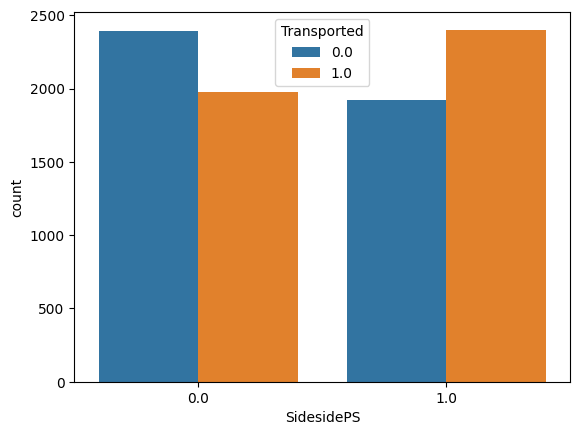

In [292]:
func_relatorio(df,'SidesidePS',True)

In [293]:
#Sem valores Nullos, eu posso guardar na váriavel que é df1
df1['SidesidePS'] = df['SidesidePS']

### Num

In [294]:
#Depois de muita tentar, achar uma resposta para prencher a coluna Num,não achei nehuma...por isso vou zerar todos os vazios, todos os 211.
df['Num'].fillna(0,inplace=True)

Valores NULLOS:0
Valores ÚNICOS:[0.000e+00 1.000e+00 2.000e+00 ... 1.885e+03 1.887e+03 1.890e+03]
QUANTIDADE valores Únicos:Num
0.0       237
82.0       34
4.0        29
56.0       28
230.0      27
         ... 
1866.0      1
1807.0      1
1865.0      1
1864.0      1
1890.0      1
Name: count, Length: 1894, dtype: int64


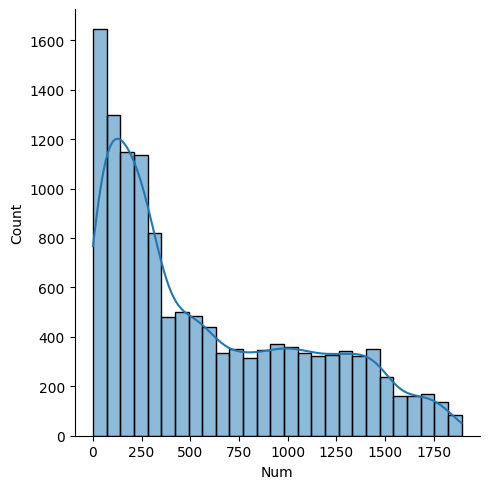

In [295]:
func_relatorio(df,'Num',False)

In [296]:
#Sem valores Nullos, eu posso guardar na váriavel que é df1
df1['Num'] = df['Num']

### RoomService

In [297]:
#Se CryoSleep for 1 então todos os recursos de luxo são zero.
df[(df['CryoSleep'] == 1) ].head(5)



,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Id,NumId,Deck,Num,SidesidePS
7,0,1.0,0.0,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,1.0,6,2,3.0,0.0,1.0
9,1,1.0,2.0,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,1.0,8,1,0.0,1.0,0.0
10,1,1.0,0.0,34.0,False,0.0,0.0,NaN,0.0,0.0,Altardr Flatic,1.0,8,2,0.0,1.0,0.0
18,2,1.0,0.0,45.0,False,0.0,0.0,0.0,0.0,0.0,Alus Upead,1.0,16,1,1.0,5.0,0.0
21,0,1.0,0.0,1.0,False,0.0,0.0,0.0,0.0,0.0,Almary Brantuarez,0.0,20,1,4.0,0.0,1.0


In [298]:
#Estou em grande dúvida, olhando a correlação das colunas, vi que praticamente a unica que tem uma correlação grande(no caso a maior, pois nemé grande), é o HomePlanet! Mas como eu poderia simplesmente colocar uma media para 170 passageiros, sendo que a media do planeta 2 é de 800... certamente nem todos pagaram valores altos assim, Ou eu deveria colocar zero pra tudo? Mas zero pra tudo iria desconfigurar a analise perfeita que diz(que todos que estão dormindo, não gastaram com nada), logo simplesmente escolher o Zero não será minha opção....Vou escolher a mediana(Se é a melhor opção? não faço a menor ideia)

In [299]:
#Agrupamento de HomePlanet e CryoSleep para achar melhor valor de Room Service.
#Primeiro que todos que tem CryoSleep em True(OU 1), receberão zero, pois se estão em Cryogenia, não gastam com serviços de luxo
medianService = df.loc[df['CryoSleep'] == 0]
medianService = medianService.groupby(['HomePlanet'])['RoomService'].median().reset_index(name='median')
medianService


,HomePlanet,median
0,0,1.0
1,1,0.0
2,2,636.5


In [300]:
#Função para preencher valores Vazios em Todos os serviços de Luxo
def fun_ServiceLux(data,column,home,sleep):

    if pd.isna(column):
        if sleep == 0:
            return data.loc[data['HomePlanet'] == home]['median'].iloc[0]
        else:
            return 0
    else:
        return column

In [301]:
#Recebendo novos valores de RoomService, com valores Null Preenchidos.
df['RoomService'] = df.apply(lambda x: fun_ServiceLux(medianService,x['RoomService'],x['HomePlanet'],x['CryoSleep']),axis=1)


In [302]:
func_relatorio(df,'RoomService',False)

Valores NULLOS:0
Valores ÚNICOS:[   0.  109.   43. ... 1278. 2835.  652.]
QUANTIDADE valores Únicos:RoomService
0.0       8427
1.0        296
2.0        113
3.0         89
4.0         71
          ... 
1240.0       1
2189.0       1
630.0        1
398.0        1
652.0        1
Name: count, Length: 1579, dtype: int64


### FoodCourt

In [303]:
#Agrupamento de HomePlanet e CryoSleep para achar melhor valor de FoodCourt.
#Primeiro que todos que tem CryoSleep em True(OU 1), receberão zero, pois se estão em Cryogenia, não gastam com serviços de luxo
medianFood = df.loc[df['CryoSleep'] == 0]
medianFood = medianFood.groupby(['HomePlanet'])['FoodCourt'].median().reset_index(name='median')
medianFood


,HomePlanet,median
0,0,1.0
1,1,1416.0
2,2,0.0


In [304]:
#Recebendo novos valores de FoodCourt, com valores Null Preenchidos.
df['FoodCourt'] = df.apply(lambda x: fun_ServiceLux(medianFood,x['FoodCourt'],x['HomePlanet'],x['CryoSleep']),axis=1)


In [305]:
func_relatorio(df,'FoodCourt',False)

Valores NULLOS:0
Valores ÚNICOS:[   0.    9. 3576. ...  873. 4813.  601.]
QUANTIDADE valores Únicos:FoodCourt
0.0        8293
1.0         288
2.0         105
4.0          75
3.0          74
           ... 
2853.0        1
9495.0        1
342.0         1
11552.0       1
601.0         1
Name: count, Length: 1954, dtype: int64


### ShoppingMall	

In [306]:
#Agrupamento de HomePlanet e CryoSleep para achar melhor valor de medianShoppping.
#Primeiro que todos que tem CryoSleep em True(OU 1), receberão zero, pois se estão em Cryogenia, não gastam com serviços de luxo
medianShoppping = df.loc[df['CryoSleep'] == 0]
medianShoppping = medianShoppping.groupby(['HomePlanet'])['ShoppingMall'].median().reset_index(name='median')
medianShoppping


,HomePlanet,median
0,0,1.0
1,1,0.0
2,2,162.0


In [307]:
#Recebendo novos valores de medianShoppping, com valores Null Preenchidos.
df['ShoppingMall'] = df.apply(lambda x: fun_ServiceLux(medianShoppping,x['ShoppingMall'],x['HomePlanet'],x['CryoSleep']),axis=1)

Valores NULLOS:0
Valores ÚNICOS:[   0.   25.  371. ... 2156. 1258. 3851.]
QUANTIDADE valores Únicos:ShoppingMall
0.0       8509
1.0        321
2.0        112
3.0         94
4.0         69
          ... 
751.0        1
1573.0       1
1541.0       1
1661.0       1
3851.0       1
Name: count, Length: 1368, dtype: int64


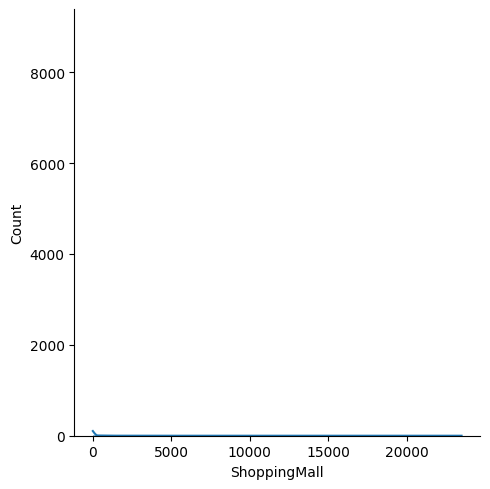

In [308]:
func_relatorio(df,'ShoppingMall',False)

### Spa

In [309]:
#Agrupamento de HomePlanet e CryoSleep para achar melhor valor de Spa.
#Primeiro que todos que tem CryoSleep em True(OU 1), receberão zero, pois se estão em Cryogenia, não gastam com serviços de luxo
medianSpa = df.loc[df['CryoSleep'] == 0]
medianSpa = medianSpa.groupby(['HomePlanet'])['Spa'].median().reset_index(name='median')
medianSpa


,HomePlanet,median
0,0,1.0
1,1,345.0
2,2,0.0


In [310]:
#Recebendo novos valores de Spa, com valores Null Preenchidos.
df['Spa'] = df.apply(lambda x: fun_ServiceLux(medianSpa,x['Spa'],x['HomePlanet'],x['CryoSleep']),axis=1)


Valores NULLOS:0
Valores ÚNICOS:[   0.  549. 6715. ... 1872. 1716. 1812.]
QUANTIDADE valores Únicos:Spa
0.0       8072
1.0        331
2.0        148
3.0         82
4.0         73
          ... 
971.0        1
2290.0       1
1450.0       1
4517.0       1
1812.0       1
Name: count, Length: 1679, dtype: int64


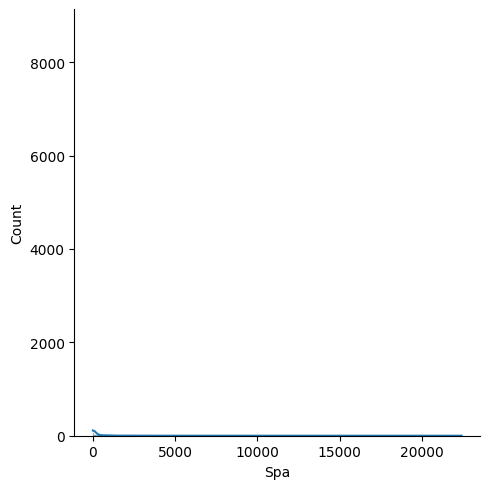

In [311]:
func_relatorio(df,'Spa',False)

### VRDeck

In [312]:
#Agrupamento de HomePlanet e CryoSleep para achar melhor valor de VRDeck.
#Primeiro que todos que tem CryoSleep em True(OU 1), receberão zero, pois se estão em Cryogenia, não gastam com serviços de luxo
medianVRDeck = df.loc[df['CryoSleep'] == 0]
medianVRDeck = medianVRDeck.groupby(['HomePlanet'])['VRDeck'].median().reset_index(name='median')
medianVRDeck


,HomePlanet,median
0,0,1.0
1,1,441.5
2,2,0.0


In [313]:
#Recebendo novos valores de VRDeck, com valores Null Preenchidos.
df['VRDeck'] = df.apply(lambda x: fun_ServiceLux(medianVRDeck,x['VRDeck'],x['HomePlanet'],x['CryoSleep']),axis=1)

In [314]:
func_relatorio(df,'VRDeck',False)

Valores NULLOS:0
Valores ÚNICOS:[    0.    44.    49. ...  3093. 14834.   494.]
QUANTIDADE valores Únicos:VRDeck
0.0        8378
1.0         324
2.0         108
3.0          89
5.0          68
           ... 
10074.0       1
3491.0        1
1469.0        1
5558.0        1
494.0         1
Name: count, Length: 1643, dtype: int64


### Juntando Serviços de Luxo

In [315]:
#Já que todos são serviços de luxo, vou juntar o gasto total, para facilitar a analise.
df['Sum_luxury'] = df['RoomService'] +df['FoodCourt'] + df['ShoppingMall'] + df['Spa'] + df['VRDeck']
df

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Id,NumId,Deck,Num,SidesidePS,Sum_luxury
0,1,0.0,0.0,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0.0,1,1,0.0,0.0,0.0,0.0
1,0,0.0,0.0,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1.0,2,1,1.0,0.0,1.0,736.0
2,1,0.0,0.0,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0.0,3,1,2.0,0.0,1.0,10383.0
3,1,0.0,0.0,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0.0,3,2,2.0,0.0,1.0,5176.0
4,0,0.0,0.0,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1.0,4,1,1.0,1.0,1.0,1091.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,0,1.0,0.0,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,NaN,9266,2,3.0,1496.0,1.0,0.0
12966,0,0.0,0.0,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,NaN,9269,1,0.0,0.0,0.0,1018.0
12967,2,1.0,2.0,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,NaN,9271,1,5.0,296.0,0.0,0.0
12968,1,0.0,1.0,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,NaN,9273,1,5.0,297.0,0.0,3203.0


In [316]:
#Observe os QUARTILS - 25%,50% e 75%
df['Sum_luxury'].describe()

count    12970.000000
mean      1440.094564
std       2812.600920
min          0.000000
25%          0.000000
50%        717.000000
75%       1444.750000
max      35987.000000
Name: Sum_luxury, dtype: float64

In [317]:
#Fazendo valores Financeiros virarem categoricos!
#Categoria 0: Valores muito baixos (25% mais baixos).
#Categoria 1: Valores baixos a médios (do Quartil de 25% à mediana).
#Categoria 2: Valores médios a altos (da mediana ao Quartil de 75%).
#Categoria 3: Valores altos a extremamente altos (do Quartil de 75% ao 99º percentil).
#Categoria 4: Valores extremamente altos (acima do 99º percentil).

df['Sum_luxury'] = df['Sum_luxury'].apply(lambda x: 0 if x <= df['Sum_luxury'].quantile(0.25) 
                       else(1 if ((x > df['Sum_luxury'].quantile(0.25)) & (x <= df['Sum_luxury'].quantile(0.50))) 
                            else(2 if ((x > df['Sum_luxury'].quantile(0.50)) & (x <= df['Sum_luxury'].quantile(0.75))) 
                                 else(3 if ((x > df['Sum_luxury'].quantile(0.75)) & (x <= df['Sum_luxury'].quantile(0.99))) else 4))))



In [318]:
#Guardando no DataFrame Df1 somente a soma dos SERVIÇOS DE LUXO
df1['Sum_luxury'] = df['Sum_luxury']
df1

,Id,NumId,Transported,HomePlanet,CryoSleep,Destination,Deck,SidesidePS,Num,Sum_luxury
0,1,1,0.0,1,0.0,0.0,0.0,0.0,0.0,0
1,2,1,1.0,0,0.0,0.0,1.0,1.0,0.0,2
2,3,1,0.0,1,0.0,0.0,2.0,1.0,0.0,3
3,3,2,0.0,1,0.0,0.0,2.0,1.0,0.0,3
4,4,1,1.0,0,0.0,0.0,1.0,1.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...
12965,9266,2,NaN,0,1.0,0.0,3.0,1.0,1496.0,0
12966,9269,1,NaN,0,0.0,0.0,0.0,0.0,0.0,2
12967,9271,1,NaN,2,1.0,2.0,5.0,0.0,296.0,0
12968,9273,1,NaN,1,0.0,1.0,5.0,0.0,297.0,3


### Age -

In [319]:
#Correlação entre as colunas
plt.figure(figsize=(10,6))

corr = df.drop('Name',axis=1).corr()
sns.heatmap(corr,annot=True,fmt=".2f", cmap='coolwarm', linewidths=.5, annot_kws={"size": 10})

<Axes: >

In [320]:
#Filtrando dados para achar as melhores medias de idade, para preencher os valores Nullos.
#Aqui estou usando a coluna HomePlanet e Sum_Luxury para tirar a melhor media das idades, pois foram as melhores no gráfico de correlação.
mediaPorHomeDesti = df.groupby(['HomePlanet','Sum_luxury']).mean('Age')['Age'].reset_index().astype({'Age':int})
mediaPorHomeDesti

,HomePlanet,Sum_luxury,Age
0,0,0,20
1,0,1,27
2,0,2,29
3,0,3,29
4,1,0,32
5,1,1,17
6,1,2,33
7,1,3,36
8,1,4,36
9,2,0,26


In [321]:
#Função para preencher valores Nullos de Age! De acordo com a media das idades , na variável mediaPorHomeDesti
def fun_mediaIdade(age,home,luxury): 
    mediaPorHomeDesti

    if pd.isna(age):
        return mediaPorHomeDesti.loc[(mediaPorHomeDesti['HomePlanet'] == home) & (mediaPorHomeDesti['Sum_luxury'] == luxury)]['Age'].iloc[0]
    else:
        return age

In [322]:
#Colocando resultados preenchidos na coluna Age!
df['Age'] = df.apply(lambda x: fun_mediaIdade(x['Age'],x['HomePlanet'],x['Sum_luxury']),axis=1)

In [323]:
func_relatorio(df,'Age',False)

Valores NULLOS:0
Valores ÚNICOS:[39. 24. 58. 33. 16. 44. 26. 28. 35. 14. 34. 45. 32. 48. 31. 27.  0.  1.
 49. 29. 10.  7. 21. 62. 15. 43. 47.  2. 20. 23. 30. 17. 55.  4. 19. 56.
 25. 38. 36. 22. 18. 42. 37. 13.  8. 40.  3. 54.  9.  6. 64. 67. 61. 50.
 41. 57. 11. 52. 51. 46. 60. 63. 59.  5. 79. 68. 74. 12. 53. 65. 71. 75.
 70. 76. 78. 73. 66. 69. 72. 77.]
QUANTIDADE valores Únicos:Age
18.0    496
20.0    494
24.0    482
21.0    468
19.0    455
       ... 
75.0      6
79.0      5
78.0      4
77.0      3
76.0      2
Name: count, Length: 80, dtype: int64


In [324]:
#Guardando no DataFrame Df1 a Idade
df1['Age'] = df['Age']

### VIP

In [325]:
#Transformando coluna booleanas em númericas
df['VIP'] = df['VIP'].apply(lambda x: 0 if x == 0 else(1 if x == 1 else x))

In [326]:
# Todos aqueles que tem familiares, mas que eles mesmo tem o VIP em NAN
quantidadeFamilyVIP = df[(df['Id'].duplicated()) & (df['VIP'].isnull())]['Id'].values
quantidadeFamilyVIP

array([ 108,  244,  680,  709,  889, 1182, 1186, 1782, 1811, 1956, 2092,
       2709, 2822, 3274, 3282, 3531, 3699, 4001, 4661, 4741, 5389, 5714,
       5900, 6035, 6121, 6199, 6309, 6549, 6684, 6741, 6766, 6816, 6864,
       6894, 6992, 7104, 7488, 7585, 7905, 8043, 8117, 8119, 8383, 8537,
       8574, 8602, 8602, 8605, 8624, 8637, 8663, 8816, 8860, 8945, 9081,
       9205,  228,  530,  717,  717,  986, 1209, 3701, 4180, 4523, 4582,
       4776, 5033, 5664, 6888, 7417, 7893, 8793, 8873, 8875], dtype=int64)

In [327]:
#resultado dos dados da coluna VIP dos familiares com valores preenchidos .
familyVIP = df.loc[df['Id'].isin(quantidadeFamilyVIP)].drop_duplicates(subset=['Id'])[['Id','VIP']]

In [328]:
#Preenchendo valores Nullos dos familiares com os dados dos familiares que tem dados.
for x in quantidadeFamilyVIP:
    vip_value = familyVIP.loc[familyVIP['Id'] == x, 'VIP'].values[0]

    df.loc[((df['VIP'].isna()) & (df['Id'] == x)), 'VIP'] = vip_value

In [329]:
#Contagens de Vip por HomePlanet
vip = df[(df['VIP'] == 1)]
vip['HomePlanet'].value_counts()

HomePlanet
1    180
2     93
Name: count, dtype: int64

In [330]:
#Levando em conta que Não temos nenhum Vip para o planeta zero, significa que todos que vieram do planeta zero, não são vip. 
df.loc[(df['VIP'] == 1) & (df['HomePlanet'] == 0)]

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Id,NumId,Deck,Num,SidesidePS,Sum_luxury


In [331]:
#Como não achei nenhuma relação padrão com outras colunas, e levando em conta que temos tão poucos VIP,  vou fazer todos se tornarem Não VIP.

df['VIP'].fillna(0,inplace=True)

Valores NULLOS:0
Valores ÚNICOS:[0. 1.]
QUANTIDADE valores Únicos:VIP
0.0    12697
1.0      273
Name: count, dtype: int64


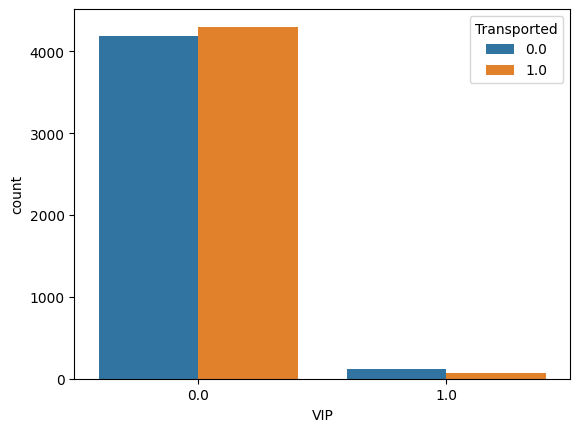

In [332]:
func_relatorio(df,'VIP')

In [333]:
#Guardando no DataFrame Df1 a coluna Vip
df1['VIP'] = df['VIP']

### Observando os Dados Tratados

In [334]:
df1

,Id,NumId,Transported,HomePlanet,CryoSleep,Destination,Deck,SidesidePS,Num,Sum_luxury,Age,VIP
0,1,1,0.0,1,0.0,0.0,0.0,0.0,0.0,0,39.0,0.0
1,2,1,1.0,0,0.0,0.0,1.0,1.0,0.0,2,24.0,0.0
2,3,1,0.0,1,0.0,0.0,2.0,1.0,0.0,3,58.0,1.0
3,3,2,0.0,1,0.0,0.0,2.0,1.0,0.0,3,33.0,0.0
4,4,1,1.0,0,0.0,0.0,1.0,1.0,1.0,2,16.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
12965,9266,2,NaN,0,1.0,0.0,3.0,1.0,1496.0,0,34.0,0.0
12966,9269,1,NaN,0,0.0,0.0,0.0,0.0,0.0,2,42.0,0.0
12967,9271,1,NaN,2,1.0,2.0,5.0,0.0,296.0,0,26.0,0.0
12968,9273,1,NaN,1,0.0,1.0,5.0,0.0,297.0,3,36.0,0.0


In [335]:
#Tirando a coluna Transported , eu não tenho nenhuma Coluna com NULLOS
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12970 entries, 0 to 12969
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Id           12970 non-null  int64  
 1   NumId        12970 non-null  int64  
 2   Transported  8693 non-null   float64
 3   HomePlanet   12970 non-null  int64  
 4   CryoSleep    12970 non-null  float64
 5   Destination  12970 non-null  float64
 6   Deck         12970 non-null  float64
 7   SidesidePS   12970 non-null  float64
 8   Num          12970 non-null  float64
 9   Sum_luxury   12970 non-null  int64  
 10  Age          12970 non-null  float64
 11  VIP          12970 non-null  float64
dtypes: float64(8), int64(4)
memory usage: 1.2 MB


In [336]:
df1.describe()

,Id,NumId,Transported,HomePlanet,CryoSleep,Destination,Deck,SidesidePS,Num,Sum_luxury,Age,VIP
count,12970.000000,12970.000000,8693.000000,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000
mean,4635.337471,1.511488,0.503624,0.673940,0.357517,0.513647,2.476947,0.495759,593.006168,1.343022,28.760139,0.021049
std,2685.904299,1.042500,0.500016,0.804706,0.479287,0.817161,1.768802,0.500001,514.464386,1.263340,14.256084,0.143552
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2306.250000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,159.250000,0.000000,20.000000,0.000000
50%,4632.000000,1.000000,1.000000,0.000000,0.000000,0.000000,3.000000,0.000000,414.000000,1.000000,27.000000,0.000000
75%,6924.750000,2.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,996.000000,2.750000,37.000000,0.000000
max,9280.000000,8.000000,1.000000,2.000000,1.000000,2.000000,7.000000,1.000000,1894.000000,4.000000,79.000000,1.000000


In [337]:
coordf1 = df1.corr()
sns.heatmap(coordf1,annot=True,vmin=-0.2, vmax=1, fmt = '.2f', cmap ='coolwarm', linewidths=.5,annot_kws={"size": 10})

<Axes: >

### TALVEZ -- convertendo variáveis categóricas em representações numéricas! 

Utilizando o get_dummies para converter variáveis categóricas em indicadores numéricos.
Isso facilita a preparação dos dados para algoritmos de aprendizado de máquina
que requerem entradas numéricas e preserva a informação das categorias originais.
HomePlanet = pd.get_dummies(df1['HomePlanet'],prefix_sep='HomePlanet',drop_first=True,dtype=int)
CryoSleep = pd.get_dummies(df1['CryoSleep'], prefix_sep='CryoSleep',drop_first=True,dtype=int)
Destination = pd.get_dummies(df1['Destination'],prefix_sep='Destination',drop_first=True,dtype=int)



### APRENDIZADO DE MAQUINA

In [371]:
#separando DataFrame Treino de Teste, utilizando coluna transported como separação(vazios vão para treino)
train = df1.loc[df1['Transported'].notnull()]
test = df1.loc[df1['Transported'].isnull()].drop('Transported',axis=1)

In [339]:
#Separando Dados de treino em Treino e Teste
x = train.drop('Transported',axis=1)
y = train['Transported']

In [340]:
#Função para facilitar a implementação dos algoritmos de aprendizado de maquinas
def fun_algoritmos(X,Y, algoritmo):

    x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=42)
    modelo = algoritmo.fit(x_train,y_train)
    predict = modelo.predict(x_test)

    acuracia_train = round(modelo.score(x_train,y_train)*100,0)
    acuracia_test = round(modelo.score(x_test,y_test)*100,0)

    predict_vc_train = cross_val_predict(algoritmo,x_train,y_train,cv=10,n_jobs=1)
    acuracia_cv_train = round(metrics.accuracy_score(y_train,predict_vc_train)*100,0)
    predict_vc_test = cross_val_predict(algoritmo,x_test,y_test,cv=10,n_jobs=1)
    acuracia_cv_test = round(metrics.accuracy_score(y_test,predict_vc_test)*100,0)



    print("Acurácia de Treino",acuracia_train)
    print("Acurácia de Teste",acuracia_test)
    print('-'*20)
    print("Acurácia de Treino - VC",acuracia_cv_train)
    print("Acurácia de Teste - VC",acuracia_cv_test)

    print('_'*20)
    print('_'*20)

    print('---TREINO---')
    print('--confusion_matrix--')
    print(metrics.confusion_matrix(y_train,predict_vc_train))
    print('--Classific_report--')
    print(metrics.classification_report(y_train,predict_vc_train))
    print('---TESTE---')
    print('--confusion_matrix--')
    print(metrics.confusion_matrix(y_test,predict_vc_test))
    print('--Classific_report--')
    print(metrics.classification_report(y_test,predict_vc_test))

    

    return  acuracia_cv_train, acuracia_cv_test



### Random Florest

In [341]:
acc_train_rd,acc_test_rd =fun_algoritmos(x,y,RandomForestClassifier(random_state=42))

Acurácia de Treino 100.0
Acurácia de Teste 74.0
--------------------
Acurácia de Treino - VC 73.0
Acurácia de Teste - VC 72.0
____________________
____________________
---TREINO---
--confusion_matrix--
[[2379  647]
 [ 990 2069]]
--Classific_report--
              precision    recall  f1-score   support

         0.0       0.71      0.79      0.74      3026
         1.0       0.76      0.68      0.72      3059

    accuracy                           0.73      6085
   macro avg       0.73      0.73      0.73      6085
weighted avg       0.73      0.73      0.73      6085

---TESTE---
--confusion_matrix--
[[996 293]
 [443 876]]
--Classific_report--
              precision    recall  f1-score   support

         0.0       0.69      0.77      0.73      1289
         1.0       0.75      0.66      0.70      1319

    accuracy                           0.72      2608
   macro avg       0.72      0.72      0.72      2608
weighted avg       0.72      0.72      0.72      2608



### Decision Tree Classifier

In [343]:
acc_train_tree,acc_test_tree = fun_algoritmos(x,y,DecisionTreeClassifier(random_state=42))

Acurácia de Treino 100.0
Acurácia de Teste 67.0
--------------------
Acurácia de Treino - VC 69.0
Acurácia de Teste - VC 65.0
____________________
____________________
---TREINO---
--confusion_matrix--
[[2073  953]
 [ 925 2134]]
--Classific_report--
              precision    recall  f1-score   support

         0.0       0.69      0.69      0.69      3026
         1.0       0.69      0.70      0.69      3059

    accuracy                           0.69      6085
   macro avg       0.69      0.69      0.69      6085
weighted avg       0.69      0.69      0.69      6085

---TESTE---
--confusion_matrix--
[[814 475]
 [446 873]]
--Classific_report--
              precision    recall  f1-score   support

         0.0       0.65      0.63      0.64      1289
         1.0       0.65      0.66      0.65      1319

    accuracy                           0.65      2608
   macro avg       0.65      0.65      0.65      2608
weighted avg       0.65      0.65      0.65      2608



### Logistic Regression

In [344]:
acc_train_lg,acc_test_lg = fun_algoritmos(x,y,LogisticRegression(random_state=42,max_iter=1000))

Acurácia de Treino 73.0
Acurácia de Teste 72.0
--------------------
Acurácia de Treino - VC 72.0
Acurácia de Teste - VC 73.0
____________________
____________________
---TREINO---
--confusion_matrix--
[[2392  634]
 [1041 2018]]
--Classific_report--
              precision    recall  f1-score   support

         0.0       0.70      0.79      0.74      3026
         1.0       0.76      0.66      0.71      3059

    accuracy                           0.72      6085
   macro avg       0.73      0.73      0.72      6085
weighted avg       0.73      0.72      0.72      6085

---TESTE---
--confusion_matrix--
[[997 292]
 [425 894]]
--Classific_report--
              precision    recall  f1-score   support

         0.0       0.70      0.77      0.74      1289
         1.0       0.75      0.68      0.71      1319

    accuracy                           0.73      2608
   macro avg       0.73      0.73      0.72      2608
weighted avg       0.73      0.73      0.72      2608



### K Neighbors Classifier

In [345]:
acc_train_kn,acc_test_kn = fun_algoritmos(x,y,KNeighborsClassifier())

Acurácia de Treino 72.0
Acurácia de Teste 55.0
--------------------
Acurácia de Treino - VC 56.0
Acurácia de Teste - VC 53.0
____________________
____________________
---TREINO---
--confusion_matrix--
[[1690 1336]
 [1337 1722]]
--Classific_report--
              precision    recall  f1-score   support

         0.0       0.56      0.56      0.56      3026
         1.0       0.56      0.56      0.56      3059

    accuracy                           0.56      6085
   macro avg       0.56      0.56      0.56      6085
weighted avg       0.56      0.56      0.56      6085

---TESTE---
--confusion_matrix--
[[673 616]
 [619 700]]
--Classific_report--
              precision    recall  f1-score   support

         0.0       0.52      0.52      0.52      1289
         1.0       0.53      0.53      0.53      1319

    accuracy                           0.53      2608
   macro avg       0.53      0.53      0.53      2608
weighted avg       0.53      0.53      0.53      2608



### Support vector machine

In [347]:
acc_train_svm,acc_test_svm = fun_algoritmos(x,y,LinearSVC(dual=False,random_state=42))

Acurácia de Treino 74.0
Acurácia de Teste 73.0
--------------------
Acurácia de Treino - VC 73.0
Acurácia de Teste - VC 74.0
____________________
____________________
---TREINO---
--confusion_matrix--
[[2530  496]
 [1123 1936]]
--Classific_report--
              precision    recall  f1-score   support

         0.0       0.69      0.84      0.76      3026
         1.0       0.80      0.63      0.71      3059

    accuracy                           0.73      6085
   macro avg       0.74      0.73      0.73      6085
weighted avg       0.74      0.73      0.73      6085

---TESTE---
--confusion_matrix--
[[1055  234]
 [ 454  865]]
--Classific_report--
              precision    recall  f1-score   support

         0.0       0.70      0.82      0.75      1289
         1.0       0.79      0.66      0.72      1319

    accuracy                           0.74      2608
   macro avg       0.74      0.74      0.73      2608
weighted avg       0.74      0.74      0.73      2608



### Gaussian Naive Bayes

In [357]:
acc_train_gaus,acc_test_gaus = fun_algoritmos(x,y,GaussianNB())

Acurácia de Treino 73.0
Acurácia de Teste 73.0
--------------------
Acurácia de Treino - VC 73.0
Acurácia de Teste - VC 73.0
____________________
____________________
---TREINO---
--confusion_matrix--
[[2466  560]
 [1083 1976]]
--Classific_report--
              precision    recall  f1-score   support

         0.0       0.69      0.81      0.75      3026
         1.0       0.78      0.65      0.71      3059

    accuracy                           0.73      6085
   macro avg       0.74      0.73      0.73      6085
weighted avg       0.74      0.73      0.73      6085

---TESTE---
--confusion_matrix--
[[1036  253]
 [ 441  878]]
--Classific_report--
              precision    recall  f1-score   support

         0.0       0.70      0.80      0.75      1289
         1.0       0.78      0.67      0.72      1319

    accuracy                           0.73      2608
   macro avg       0.74      0.73      0.73      2608
weighted avg       0.74      0.73      0.73      2608



### Stochastic Gradient Descent


In [353]:
acc_train_sgd,acc_test_sgd = fun_algoritmos(x,y,SGDClassifier(random_state=42))

Acurácia de Treino 51.0
Acurácia de Teste 51.0
--------------------
Acurácia de Treino - VC 51.0
Acurácia de Teste - VC 50.0
____________________
____________________
---TREINO---
--confusion_matrix--
[[1457 1569]
 [1427 1632]]
--Classific_report--
              precision    recall  f1-score   support

         0.0       0.51      0.48      0.49      3026
         1.0       0.51      0.53      0.52      3059

    accuracy                           0.51      6085
   macro avg       0.51      0.51      0.51      6085
weighted avg       0.51      0.51      0.51      6085

---TESTE---
--confusion_matrix--
[[680 609]
 [683 636]]
--Classific_report--
              precision    recall  f1-score   support

         0.0       0.50      0.53      0.51      1289
         1.0       0.51      0.48      0.50      1319

    accuracy                           0.50      2608
   macro avg       0.50      0.50      0.50      2608
weighted avg       0.50      0.50      0.50      2608



### Gradient boost Classifier


In [351]:
acc_train_gb,acc_test_gb = fun_algoritmos(x,y,GradientBoostingClassifier(random_state=42))

Acurácia de Treino 77.0
Acurácia de Teste 75.0
--------------------
Acurácia de Treino - VC 76.0
Acurácia de Teste - VC 74.0
____________________
____________________
---TREINO---
--confusion_matrix--
[[2503  523]
 [ 950 2109]]
--Classific_report--
              precision    recall  f1-score   support

         0.0       0.72      0.83      0.77      3026
         1.0       0.80      0.69      0.74      3059

    accuracy                           0.76      6085
   macro avg       0.76      0.76      0.76      6085
weighted avg       0.76      0.76      0.76      6085

---TESTE---
--confusion_matrix--
[[1028  261]
 [ 408  911]]
--Classific_report--
              precision    recall  f1-score   support

         0.0       0.72      0.80      0.75      1289
         1.0       0.78      0.69      0.73      1319

    accuracy                           0.74      2608
   macro avg       0.75      0.74      0.74      2608
weighted avg       0.75      0.74      0.74      2608



In [359]:
#Comparando todos os modelos
modelos = pd.DataFrame({'modelo':['RandomForestClassifier','DecisionTreeClassifier','LogisticRegression','LinearSVC','KNeighborsClassifier','GaussianNB','SGDClassifier','GradientBoostingClassifier'],
    'Acuracia_Treino':[acc_train_rd,acc_train_tree,acc_train_lg,acc_train_svm,acc_train_kn,acc_train_gaus,acc_train_sgd,acc_train_gb],
                        'Acuracia_Teste':[acc_test_rd,acc_test_tree,acc_test_lg,acc_test_svm,acc_test_kn,acc_test_gaus,acc_test_sgd,acc_test_gb]})
modelos.sort_values(by=['Acuracia_Teste','Acuracia_Treino'],ascending=False)

,modelo,Acuracia_Treino,Acuracia_Teste
7,GradientBoostingClassifier,76.0,74.0
3,LinearSVC,73.0,74.0
5,GaussianNB,73.0,73.0
2,LogisticRegression,72.0,73.0
0,RandomForestClassifier,73.0,72.0
1,DecisionTreeClassifier,69.0,65.0
4,KNeighborsClassifier,56.0,53.0
6,SGDClassifier,51.0,50.0


In [367]:
#Parâmetros para o algoritmo escolhido
params = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'subsample': [0.8, 0.9],
}

In [368]:
#Aplicando e treinando modelo com  parâmetros
gbc = GradientBoostingClassifier()
gbc_vc = GridSearchCV(estimator=gbc, param_grid=params, cv=10,n_jobs=-1)

gbc_vc.fit(x,y)

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [3],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5], 'n_estimators': [50, 100],
                         'subsample': [0.8, 0.9]})

In [369]:
print(f'Melhor pontuação:{gbc_vc.best_score_}')
print(f'Melhores parâmetros:{gbc_vc.best_estimator_}')

Melhor pontuação:0.7359980424057246
Melhores parâmetros:GradientBoostingClassifier(learning_rate=0.01, subsample=0.8)


In [378]:
#Predição dos Dados de teste

GradientBoostingClassifier_pred = gbc_vc.predict(test).astype(bool)
GradientBoostingClassifier_pred

array([ True, False,  True, ...,  True, False,  True])

In [379]:
#Salvando arquivos para submeter ao Kaggle
kaggle =  pd.DataFrame({'PassengerId':passengerId,'Transported': GradientBoostingClassifier_pred })
kaggle.to_csv('titanicEspacial_GradientBoostingClassifier_pred.csv',index=False)

In [380]:
kaggle

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,False
4,0023_01,False
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,False
